- Exercise 1.3

Load the Yale B image database and compute the economy SVD using a standard svd command.

Now compute the SVD with the method of snapshots.

Compare the singular value spectra on a log plot.

Compare the first 10 left singular vectors using each method (remember to reshape them into the shape of a face).

Now compare a few singular vectors farther down the spectrum.

Explain your findings.

In [1]:
import scipy.io  # io: imput and output
import numpy as np
import os

In [2]:
# Load the Yale B image database
mat_contents = scipy.io.loadmat(os.path.join('..','Data','allFaces.mat'))

In [3]:
print(type(mat_contents))

<class 'dict'>


In [4]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'n', 'm', 'sub', 'nfaces', 'person'])

In [5]:
# Compute the economy SVD using a standard svd command
faces = mat_contents['faces']   # (32256, 2410)
U, S, VT = np.linalg.svd(faces, full_matrices=False)

In [6]:
type(faces)

numpy.ndarray

In [7]:
faces # uint8: unsigned integer, 0-255

array([[80, 94, 59, ...,  3,  4,  4],
       [81, 87, 67, ...,  4,  4,  3],
       [80, 88, 66, ...,  2,  4,  4],
       ...,
       [14,  7,  6, ...,  0,  1,  1],
       [14,  9,  6, ...,  1,  1,  0],
       [11,  8,  7, ...,  1,  1,  2]], dtype=uint8)

In [8]:
faces = np.array(faces, dtype=np.float64)

In [9]:
faces

array([[80., 94., 59., ...,  3.,  4.,  4.],
       [81., 87., 67., ...,  4.,  4.,  3.],
       [80., 88., 66., ...,  2.,  4.,  4.],
       ...,
       [14.,  7.,  6., ...,  0.,  1.,  1.],
       [14.,  9.,  6., ...,  1.,  1.,  0.],
       [11.,  8.,  7., ...,  1.,  1.,  2.]])

In [10]:
# Compute the SVD with the method of snapshots
XstarX = faces.T @ faces
XstarX.shape

(2410, 2410)

In [11]:
XstarX

array([[4.64103083e+08, 4.77242442e+08, 4.42454385e+08, ...,
        1.30105066e+08, 1.25883957e+08, 9.09966380e+07],
       [4.77242442e+08, 5.06884501e+08, 4.83618748e+08, ...,
        1.28004746e+08, 1.26161497e+08, 9.27405310e+07],
       [4.42454385e+08, 4.83618748e+08, 4.86957051e+08, ...,
        1.15763406e+08, 1.17764059e+08, 8.79090770e+07],
       ...,
       [1.30105066e+08, 1.28004746e+08, 1.15763406e+08, ...,
        1.53874566e+08, 1.53975660e+08, 8.93136920e+07],
       [1.25883957e+08, 1.26161497e+08, 1.17764059e+08, ...,
        1.53975660e+08, 1.84784787e+08, 1.19417820e+08],
       [9.09966380e+07, 9.27405310e+07, 8.79090770e+07, ...,
        8.93136920e+07, 1.19417820e+08, 1.05651857e+08]])

In [12]:
S2_ss, V_ss = np.linalg.eig(XstarX)

In [13]:
print(S2_ss.shape)
print(V_ss.shape)
print(S2_ss)

(2410,)
(2410, 2410)
[4.89735533e+11 1.01226824e+11 1.74863996e+10 ... 1.32895237e+05
 1.41621125e+05 1.39533103e+05]


In [14]:
print(np.sort(S2_ss))

[1.36169069e+03 1.41274782e+03 2.30319587e+03 ... 1.74863996e+10
 1.01226824e+11 4.89735533e+11]


In [15]:
index = np.argsort(-1*S2_ss)

In [16]:
index

array([   0,    1,    2, ..., 1158, 1222,  991])

In [17]:
S_ss = np.sqrt(S2_ss[index])

In [18]:
import matplotlib.pyplot as plt

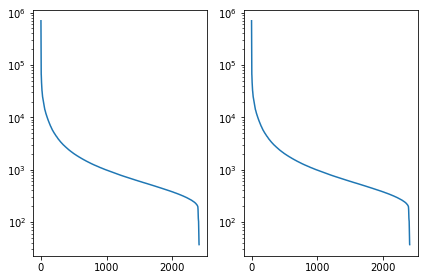

In [19]:
fig, axs = plt.subplots(1,2)
axs[0].semilogy(S)     # singular value spectra by standard svd
axs[1].semilogy(S_ss)  # singular value spectra by snapshot method

fig.tight_layout()

In [21]:
print(S_ss)
print(1/S_ss)

[6.99811069e+05 3.18161632e+05 1.32236151e+05 ... 4.79916229e+01
 3.75865378e+01 3.69010933e+01]
[1.42895711e-06 3.14305654e-06 7.56222857e-06 ... 2.08369699e-02
 2.66052704e-02 2.70994681e-02]


In [23]:
Sinv = np.diag(1/S_ss)

In [24]:
V_Sinv = V_ss @ Sinv

In [26]:
U_ss = faces @ V_Sinv

In [29]:
n = int(mat_contents['n'])
m = int(mat_contents['m'])

print(m)
print(n)

168
192


In [30]:
U_vs_Uss = np.zeros((n*4, m*5))

In [31]:
Ustack = np.column_stack((U[:,:10], U_ss[:,:10]))

In [37]:
Ustack.shape

(32256, 20)

In [42]:
for j in range(4):
    for k in range(5):
        print(j*5+k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [43]:
for j in range(4):
    for k in range(5):
        U_vs_Uss[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(Ustack[:,j*5+k],(m,n)).T

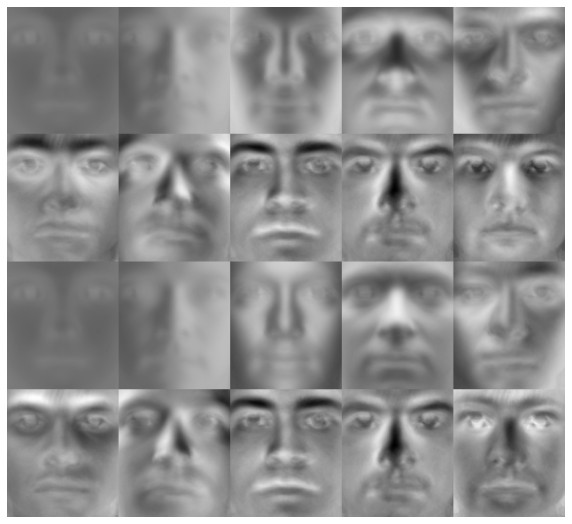

In [45]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

img = plt.imshow(U_vs_Uss)
img.set_cmap('gray')
plt.axis('off')
plt.show()


- Exercise 1.4

Generate a random 100 by 100 matrix, i.e., a matrix whose entries are sampled from a normal distribution.

Compute the SVD of this matrix and plot the singular values.

Repeat this 100 times and plot the distribution of singular values in a box-and-whisker plot.

Plot the mean and median singular values as a function of r.

Now repeat this for different matrix sizes (e.g., 50 by 50, 200 by 200, 500 by 500, 1000 by 1000, etc.).

In [46]:
# Generate a random 100 by 100 matrix
# the entries are sampled from N(mu=0, sigma=1)
np.random.seed(6397)
n = 100
A = np.random.normal(0,1,(n,n))

In [47]:
# Compute the SVD of this matrix
U, S, VT = np.linalg.svd(A, full_matrices=True)

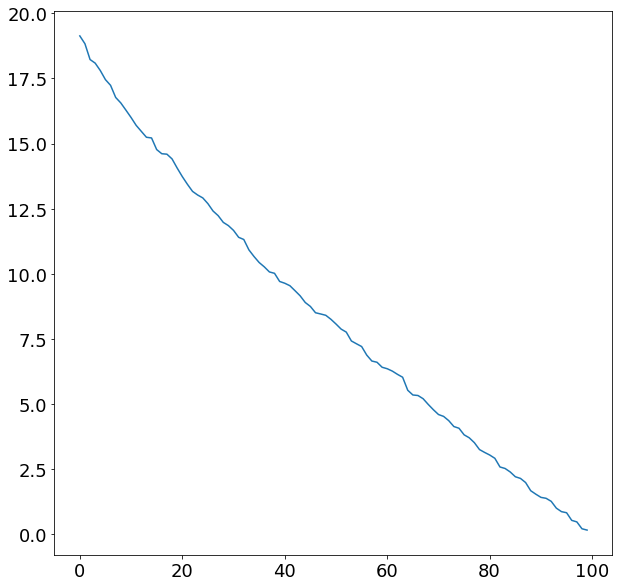

In [48]:
# Plot the singular values
plt.plot(S)
plt.show()

In [50]:
# Repeat this 100 times
k = 100
S_mat = np.zeros((k,n))
for i in range(k):
    Ai = np.random.normal(0,1,(n,n))
    U, S, VT = np.linalg.svd(Ai, full_matrices=True)
    S_mat[i,:] = S

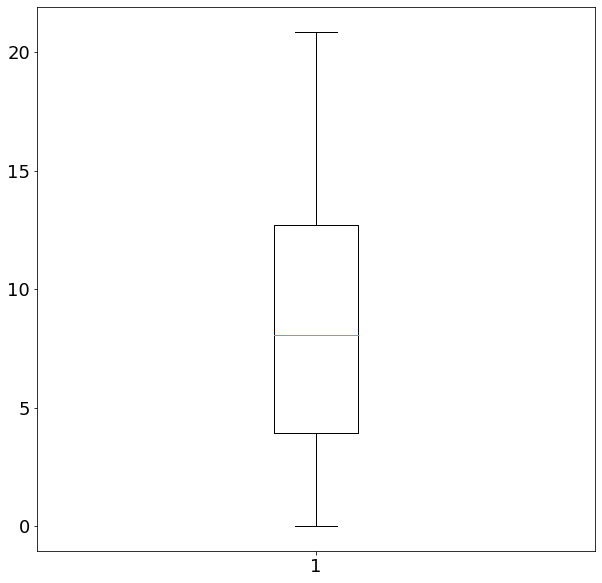

In [51]:
# Plot the distribution of singular values in a box-and-whisker plot
plt.boxplot(S_mat.flatten())
plt.show()

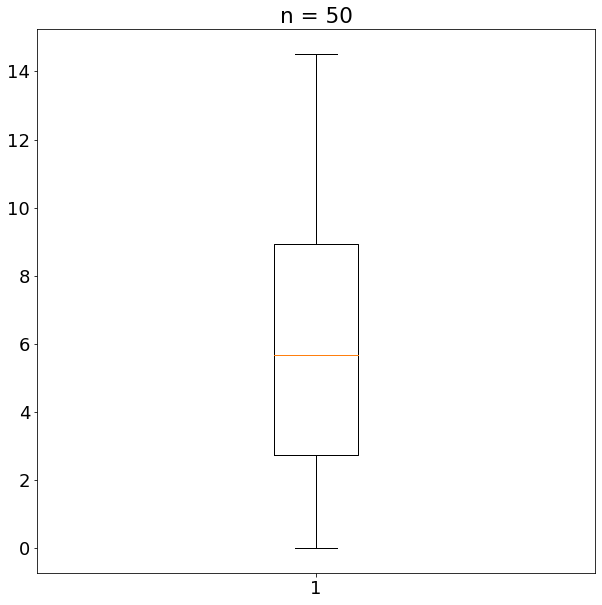

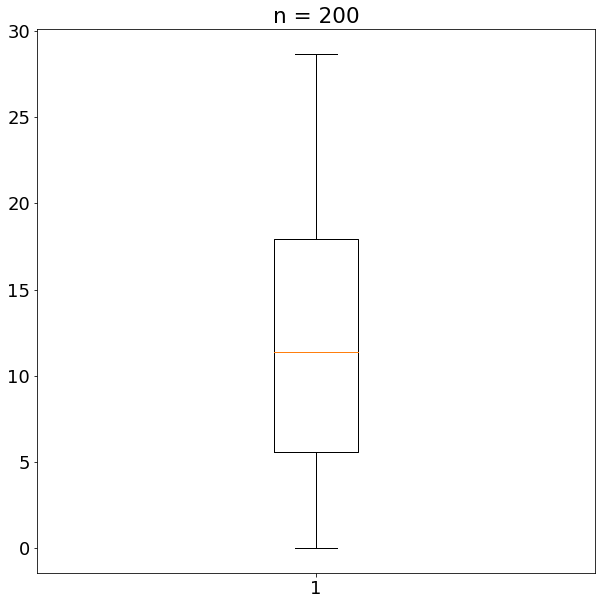

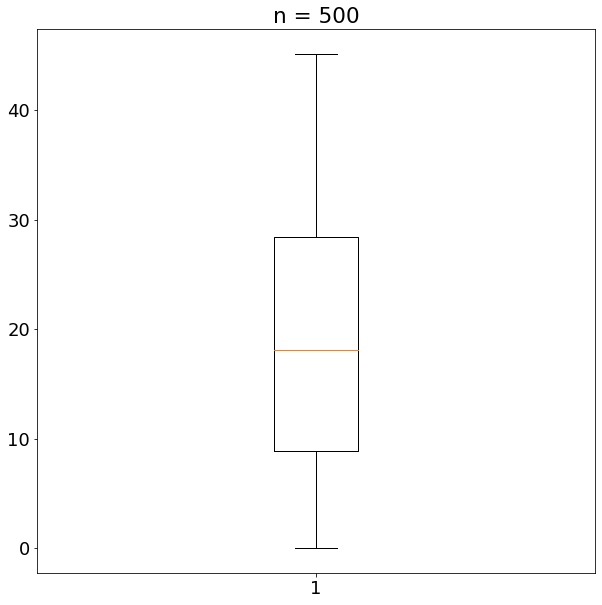

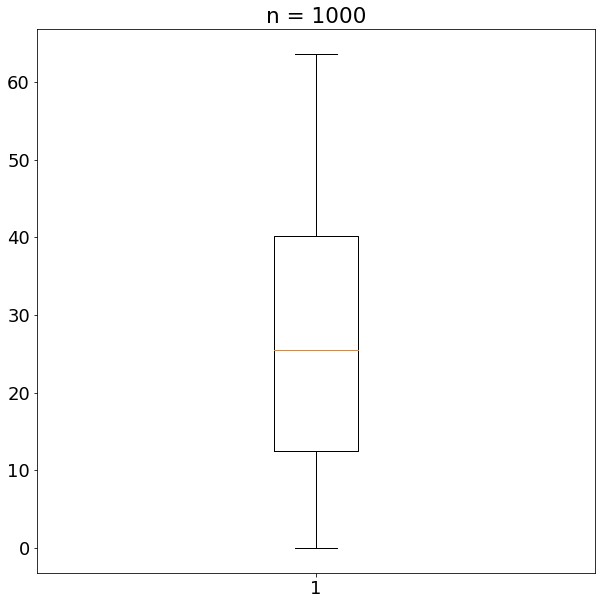

In [52]:
# Repeat this for different matrix sizes
for n in (50, 200, 500, 1000):
    S_mat = np.zeros((k,n))
    for i in range(k):
        Ai = np.random.normal(0,1,(n,n))
        U, S, VT = np.linalg.svd(Ai, full_matrices=True)
        S_mat[i,:] = S

    plt.boxplot(S_mat.flatten())
    plt.title('n = ' + str(n))
    plt.show()